In [3]:
!pip install ultralytics opencv-python matplotlib


image 1/1 /content/pedestrian-road-traffic-street-car-hour-873405-pxhere.com.jpg: 448x640 11 persons, 26 cars, 11 motorcycles, 2 trucks, 1103.2ms
Speed: 3.1ms preprocess, 1103.2ms inference, 2.3ms postprocess per image at shape (1, 3, 448, 640)


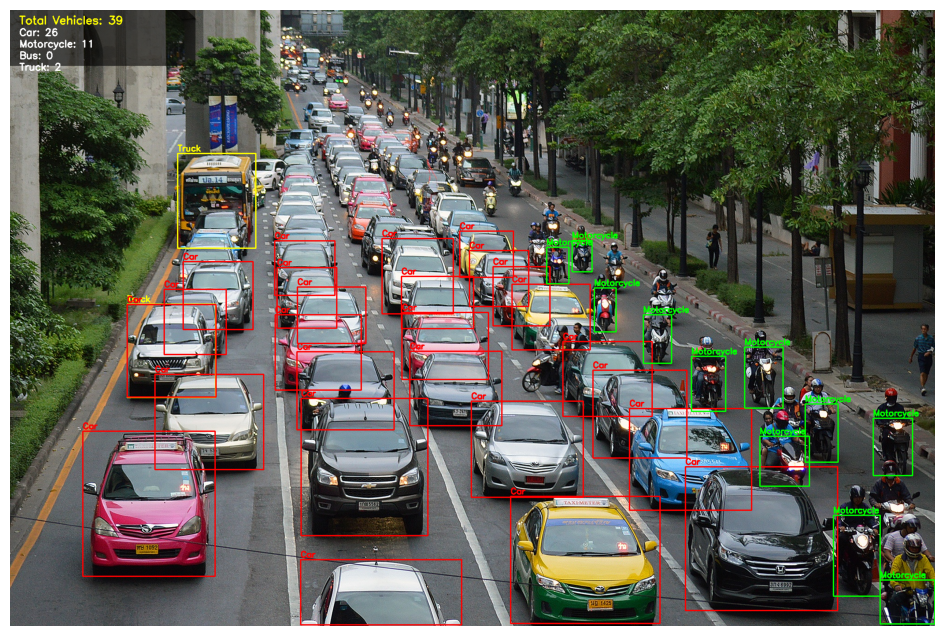

Detection Completed.


In [4]:
import cv2
import numpy as np
from ultralytics import YOLO

# -------------------------
# CONFIG
# -------------------------
IMAGE_PATH = "/content/pedestrian-road-traffic-street-car-hour-873405-pxhere.com.jpg"
MODEL_PATH = "yolov8m.pt"   # better accuracy than n model
CONF = 0.3

VEHICLE_CLASSES = {
    2: "Car",
    3: "Motorcycle",
    5: "Bus",
    7: "Truck"
}

COLORS = {
    "Car": (0, 0, 255),
    "Motorcycle": (0, 255, 0),
    "Bus": (255, 0, 0),
    "Truck": (0, 255, 255)
}

# -------------------------
# LOAD MODEL
# -------------------------
model = YOLO(MODEL_PATH)

# -------------------------
# RUN DETECTION
# -------------------------
results = model(IMAGE_PATH, conf=CONF)

img = cv2.imread(IMAGE_PATH)
vehicle_count = 0
class_count = {name:0 for name in VEHICLE_CLASSES.values()}

for r in results:
    for box in r.boxes:
        cls = int(box.cls[0])

        if cls in VEHICLE_CLASSES:
            vehicle_count += 1
            label = VEHICLE_CLASSES[cls]
            class_count[label] += 1

            x1, y1, x2, y2 = map(int, box.xyxy[0])
            color = COLORS[label]

            # Draw box
            cv2.rectangle(img, (x1,y1), (x2,y2), color, 2)

            # Label text
            text = f"{label}"
            cv2.putText(img, text, (x1, y1-5),
                        cv2.FONT_HERSHEY_SIMPLEX,
                        0.6, color, 2)

# -------------------------
# ADD SUMMARY PANEL
# -------------------------
panel_height = 120
overlay = img.copy()
cv2.rectangle(overlay, (0,0), (400,panel_height), (0,0,0), -1)
alpha = 0.6
img = cv2.addWeighted(overlay, alpha, img, 1-alpha, 0)

y_offset = 30
cv2.putText(img, f"Total Vehicles: {vehicle_count}",
            (20,y_offset), cv2.FONT_HERSHEY_SIMPLEX,
            0.8, (0,255,255), 2)

for cls_name, count in class_count.items():
    y_offset += 25
    cv2.putText(img, f"{cls_name}: {count}",
                (20,y_offset), cv2.FONT_HERSHEY_SIMPLEX,
                0.7, (255,255,255), 2)

# -------------------------
# SAVE & DISPLAY
# -------------------------
cv2.imwrite("professional_output.jpg", img)

from matplotlib import pyplot as plt
plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

print("Detection Completed.")